# Importing Libraries 📚

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.impute import SimpleImputer
from sklearn import preprocessing, compose, decomposition, impute
# from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA


# Reading From the Dataset 📖

In [114]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

data = pd.read_csv('./iris.data', names=col_names)
print(data)

     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
154           6.3          2.5           5.0          1.9  Iris-virginica
155           6.5          3.0           5.2          2.0  Iris-virginica
156           6.5          3.0           5.2          2.0             NaN
157           6.2          3.4           5.4          2.3  Iris-virginica
158           5.9          3.0           5.1          1.8  Iris-virginica

[159 rows x 5 columns]


---

# 1. Handling Missing Values 🔎 

## 1.1 Finding NaN Data in Dataset

- `False` : Valid Data
- `True`: NaN Data

In [115]:
print(data.isna())

     sepal_length  sepal_width  petal_length  petal_width  target
0           False        False         False        False   False
1           False        False         False        False   False
2           False        False         False        False   False
3           False        False         False        False   False
4           False        False         False        False   False
..            ...          ...           ...          ...     ...
154         False        False         False        False   False
155         False        False         False        False   False
156         False        False         False        False    True
157         False        False         False        False   False
158         False        False         False        False   False

[159 rows x 5 columns]


## 1.2 Removing Invalid Data Using `dropna()`

> After calling this method, **9** invalid rows will be removed.

In [116]:
data = data.dropna()
print(data)

     sepal_length  sepal_width  petal_length  petal_width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
153           6.7          3.0           5.2          2.3  Iris-virginica
154           6.3          2.5           5.0          1.9  Iris-virginica
155           6.5          3.0           5.2          2.0  Iris-virginica
157           6.2          3.4           5.4          2.3  Iris-virginica
158           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


---

# 2. Handling Nomial Data 🏷️ 

## 2.1 Label Encoding (in `target` column)

| Nomial Value  | Numeric Value |
|---------------|---------------|
|Iris-setosa    | 0             |
|Iris-versicolor| 1             |
|Iris-virginica | 2             |

> 🔴 **Disadvantages**: 

In [117]:
le = preprocessing.LabelEncoder()
data['target'] = le.fit_transform(data.target.values)
print(data)

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
153           6.7          3.0           5.2          2.3       2
154           6.3          2.5           5.0          1.9       2
155           6.5          3.0           5.2          2.0       2
157           6.2          3.4           5.4          2.3       2
158           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


## 2.2 One Hot Encoding

Description...

### Example

---

# 3. Normalization 🔔

## 3.1 Bofore Normalization

In [118]:
print(data.mean(axis = 0))
print(data.std(axis = 0))


sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64
sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
target          0.819232
dtype: float64


## 3.2 Normalizing Data Using `StandardScaler`

In [119]:
scaler = preprocessing.StandardScaler()

column_transformer = compose.ColumnTransformer([
        ('somename', scaler, col_names[:4])
    ], remainder='passthrough')

scaled_data = column_transformer.fit_transform(data)
# scaled_data = scaler.fit_transform(data)

# print(scaled_data)

print(scaled_data.mean(axis=0))
print(scaled_data.std(axis=0))


[-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16
  1.00000000e+00]
[1.         1.         1.         1.         0.81649658]


---

# 4. Principal Component Analysis (PCA)

In [122]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print(principal_components.shape)


(150, 2)


---

# 5. Visualization 🎨 

## 5.1 Scatter Plot

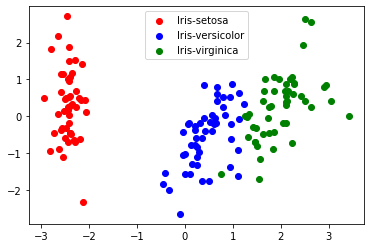

In [141]:
get_label_info = {
    0: {
        'name': 'Iris-setosa',
        'color':'red'
    },
    1: {
        'name': 'Iris-versicolor',
        'color':'blue'
    },
    2: {
        'name': 'Iris-virginica',
        'color':'green'
    },
}
data = np.array(data)
fig, ax = plt.subplots()
for label in [0, 1, 2]:
    category_indexes = np.where(data[:,4] == label)
    ax.scatter(
        principal_components[category_indexes, 0], 
        principal_components[category_indexes, 1], 
        c=get_label_info[label]['color'], 
        label=get_label_info[label]['name']
    )
ax.legend()
plt.show()

## 5.2 Boxplot

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

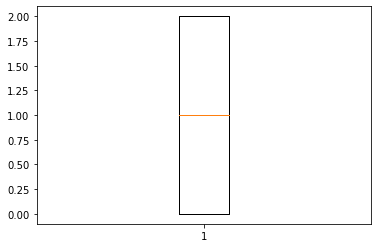

In [143]:
fig, ax = plt.subplots()


print(data)
# ax.boxplot(scaled_data)
ax.boxplot(data[:,4])

plt.show()